In [14]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from textblob import TextBlob
from wordcloud import WordCloud

In [41]:
# Load dataset
df = pd.read_csv("/content/Flipkart_Reviews - Electronics.csv.zip")

In [44]:
df.shape

(9374, 10)

In [45]:
df.head()

,product_id,product_title,rating,summary,review,location,date,upvotes,downvotes,helpfulness
0,ACCFZGAQJGYCYDCM,BoAt Rockerz 235v2 with ASAP charging Version ...,5,Terrific purchase,1-more flexible2-bass is very high3-sound clar...,Shirala,8 months ago,1390,276,1114
1,ACCFZGAQJGYCYDCM,BoAt Rockerz 235v2 with ASAP charging Version ...,5,Terrific purchase,Super sound and good looking I like that prize,Visakhapatnam,8 months ago,643,133,510
2,ACCFZGAQJGYCYDCM,BoAt Rockerz 235v2 with ASAP charging Version ...,5,Super!,Very much satisfied with the device at this pr...,Kozhikode,"Feb, 2020",1449,328,1121
3,ACCFZGAQJGYCYDCM,BoAt Rockerz 235v2 with ASAP charging Version ...,5,Super!,"Nice headphone, bass was very good and sound i...",Jaora,7 months ago,160,28,132
4,ACCFZGAQJGYCYDCM,BoAt Rockerz 235v2 with ASAP charging Version ...,5,Terrific purchase,Sound quality super battery backup super quali...,New Delhi,8 months ago,533,114,419


In [47]:
df.describe()

,rating,upvotes,downvotes,helpfulness
count,9374.000000,9374.000000,9374.000000,9374.000000
mean,4.094623,8.102731,1.911457,6.191274
std,1.345756,102.296230,15.389562,91.240569
min,1.000000,0.000000,0.000000,-259.000000
25%,4.000000,0.000000,0.000000,0.000000
50%,5.000000,0.000000,0.000000,0.000000
75%,5.000000,1.000000,0.000000,1.000000
max,5.000000,7611.000000,435.000000,7176.000000


In [49]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9374 entries, 0 to 9373
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   product_id     9374 non-null   object
 1   product_title  9374 non-null   object
 2   rating         9374 non-null   int64 
 3   summary        9374 non-null   object
 4   review         9374 non-null   object
 5   location       8081 non-null   object
 6   date           9374 non-null   object
 7   upvotes        9374 non-null   int64 
 8   downvotes      9374 non-null   int64 
 9   helpfulness    9374 non-null   int64 
dtypes: int64(4), object(6)
memory usage: 732.5+ KB


In [ ]:
# Clean data
df.dropna(subset=["review", "rating"], inplace=True)

In [ ]:
# Sentiment Analysis
def get_sentiment(text):
    polarity = TextBlob(text).sentiment.polarity
    if polarity > 0.1:
        return "Positive"
    elif polarity < -0.1:
        return "Negative"
    else:
        return "Neutral"
df["sentiment"] = df["review"].apply(get_sentiment)

In [16]:
# 📊 Donut Chart - Sentiment Distribution
sentiment_counts = df["sentiment"].value_counts()
fig = go.Figure(data=[go.Pie(labels=sentiment_counts.index,
                             values=sentiment_counts.values,
                             hole=0.4,
                             marker=dict(colors=['#2ecc71','#e74c3c','#f1c40f']))])
fig.update_layout(title_text="Sentiment Donut Chart")
fig.show()

In [17]:
# 📈 Rating Distribution - Pie Chart
rating_counts = df["rating"].value_counts().sort_index()
fig = go.Figure(data=[go.Pie(labels=rating_counts.index.astype(str),
                             values=rating_counts.values,
                             hole=0.3)])
fig.update_layout(title_text="Ratings Distribution - Pie Chart")
fig.show()

<ipython-input-18-251305dc4f1e>:3: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




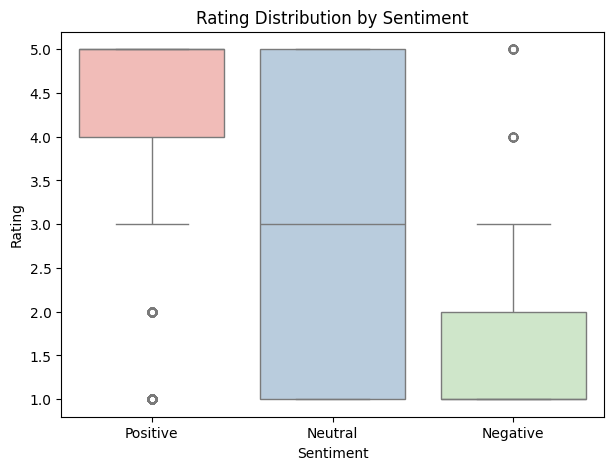

In [18]:
# 📉 Boxplot: Ratings per Sentiment
plt.figure(figsize=(7, 5))
sns.boxplot(x="sentiment", y="rating", data=df, palette="Pastel1")
plt.title("Rating Distribution by Sentiment")
plt.xlabel("Sentiment")
plt.ylabel("Rating")
plt.show()

In [19]:
# 📈 Sentiment Trend over Review Index (or Date if Available)
if "review_date" in df.columns:
    df["review_date"] = pd.to_datetime(df["review_date"])
    trend = df.groupby(pd.Grouper(key="review_date", freq="W"))["sentiment"].value_counts().unstack().fillna(0)
    trend.plot(kind="line", figsize=(10, 5), title="Sentiment Trend Over Time")
    plt.ylabel("Review Count")
    plt.show()

In [20]:
# 🌟 Barplot: Top 5 Reviewed Products
top_products = df["product_title"].value_counts().head(5)
fig = px.bar(x=top_products.index, y=top_products.values, title="Top Reviewed Products",
             labels={"x": "Product Title", "y": "Review Count"}, color=top_products.values)
fig.show()

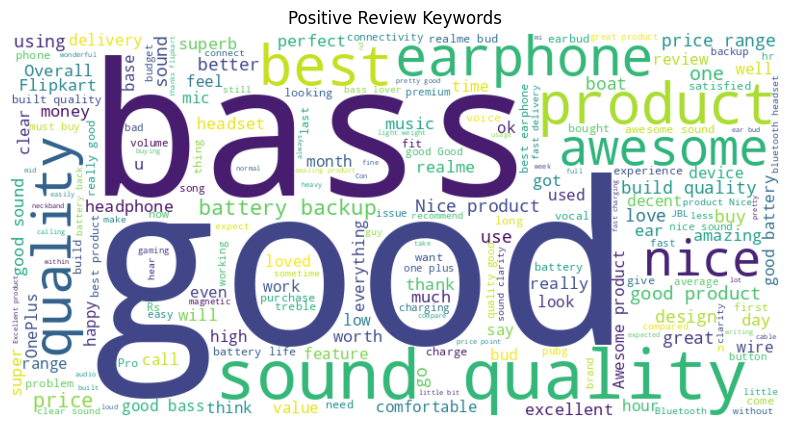

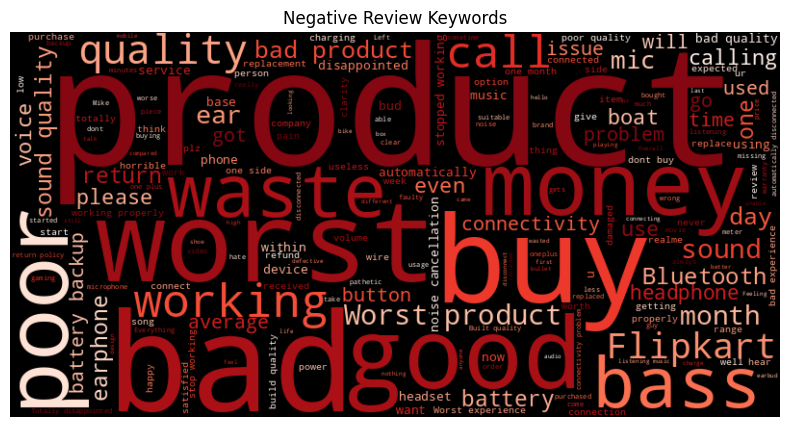

In [21]:
# ☁️ WordClouds
positive_reviews = " ".join(df[df["sentiment"] == "Positive"]["review"])
negative_reviews = " ".join(df[df["sentiment"] == "Negative"]["review"])

wordcloud_pos = WordCloud(background_color="white", width=800, height=400).generate(positive_reviews)
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud_pos, interpolation="bilinear")
plt.axis("off")
plt.title("Positive Review Keywords")
plt.show()

wordcloud_neg = WordCloud(background_color="black", colormap="Reds", width=800, height=400).generate(negative_reviews)
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud_neg, interpolation="bilinear")
plt.axis("off")
plt.title("Negative Review Keywords")
plt.show()

In [42]:
# 🙌 Most Helpful Reviews
df["helpfulness"] = df["upvotes"] - df["downvotes"]
most_helpful = df.sort_values(by="helpfulness", ascending=False)[["product_title", "review", "rating", "helpfulness"]].head(5)
print("Most Helpful Reviews:")
print(most_helpful.to_string(index=False))

Most Helpful Reviews:
                               product_title                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                              review  rating  helpfulness
      realme Buds Wireless Bluetooth Headset                      I will tell you some hidden features that you might have not heard and will summarize my review as follows first:👉Sound quality is 4/5👉Build and quality 5/5👉Features 5/5👉Looks 5/5👉 Battery 6/5 yes its 6/5👌👉Overall price to product 5/5👈👌If your Budget allows you can buy them they are really greatNOW SOME HIDDEN Features not actually hidden but y